In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset=pd.read_csv('Credit_Card_Applications.csv')

In [4]:
X=dataset.iloc[: ,:-1].values
Y=dataset.iloc[: ,-1].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

In [6]:
!pip install MiniSom

In [7]:
from minisom import MiniSom

In [8]:
##Tarining the som
#sigma=radius
#learning_rate=by how much amount the weights will get updated
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

In [9]:
#bone=window that will initialize the map
from pylab import bone,pcolor,colorbar,plot,show

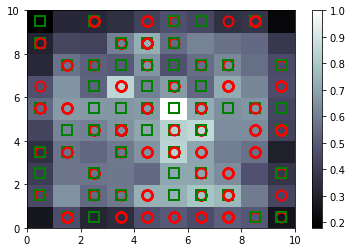

In [10]:
bone()
pcolor(som.distance_map().T)#matrix
colorbar()
markers=['o','s']#o=circle,s=square
colors=['r','g']#r=red,g=green
for i,x in enumerate(X):
    w=som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,markers[Y[i]],markeredgecolor=colors[Y[i]],markerfacecolor='None',markersize=10,markeredgewidth=2)
show()
    

In [20]:
#Finding the Frauds
mappings=som.win_map(X)
frauds=np.concatenate((mappings[(6,6)],mappings[(4,7)]),axis=0)
frauds=sc.inverse_transform(frauds)
print(frauds)

[[1.5765257e+07 1.0000000e+00 2.2750000e+01 1.1000000e+01 2.0000000e+00
  1.1000000e+01 4.0000000e+00 2.5000000e+00 1.0000000e+00 1.0000000e+00
  7.0000000e+00 1.0000000e+00 2.0000000e+00 1.0000000e+02 8.1000000e+02]
 [1.5631685e+07 1.0000000e+00 2.3170000e+01 0.0000000e+00 2.0000000e+00
  1.3000000e+01 4.0000000e+00 8.5000000e-02 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5753591e+07 1.0000000e+00 2.6750000e+01 1.1250000e+00 2.0000000e+00
  1.4000000e+01 8.0000000e+00 1.2500000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 5.2990000e+03]
 [1.5614813e+07 1.0000000e+00 2.0250000e+01 9.9600000e+00 2.0000000e+00
  1.0000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5571081e+07 1.0000000e+00 2.2670000e+01 1.0500000e+01 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.3350000e+00 1.0000000e+00 0.